# Lecture on Two level system



In [5]:
#import your libraries first
import numpy as np
import matplotlib.pyplot as plt #Library for plotting
%matplotlib inline
#OBE = Optical Bloch Equations
import OBE_Tools as OBE
import time

 We have two state system with the lowest level $|1\rangle$ and $|2\rangle$, coupled by Laser ($\Omega(t)$)
 
 Working in reduced units (or dimensionless) $\hbar=1$
 
 State vector $|\psi(t)\rangle= c_1(t)|1\rangle+c_2(t)|2\rangle$,
 
 The equation of motion govering the system $i\hbar\frac{d}{dt}|\psi(t)\rangle=H|\psi(t)\rangle$ where this can rewrite $i\hbar\frac{d|\psi(t)\rangle}{|\psi(t)\rangle}=Hdt$
 
 If the Hamiltonian is time independent (i.e H is constant), solution is expressed as $|\psi(t)\rangle = exp(-iHt)|\psi(0)\rangle$
 
 Assume all the population is in the ground state $|\psi(0)\rangle= (1, 0)^T$
 
 So the probability amplitude is $|c_{1,2}|^2=c^*_{1,2}c_{1,2}$

In [11]:
times = np.linspace(0,8*np.pi, 500)
Omegas = [1]
Deltas = [0]
H = OBE.Hamiltonian(Omegas, Deltas)# This constructs your Hamiltonian
psi_0 = np.transpose(np.asarray([1,0]))# initial condition, system is in the ground state
pops = np.zeros((len(times),2))# empty array

In [14]:
for i, t in enumerate(times):
    sol = OBE.time_evolve(-1j*H, t, psi_0)# complex number i, time evolution, propagation
    c_1, c_2 = sol[0], sol[1]
    factor = np.absolute(c_1)**2 +np.absolute(c_2)**2 # NOrmalization
    popn = [np.absolute(c_1)**2,np.absolute(c_2)**2]
    pops[i,:] =popn/factor

Text(0, 0.5, 'Population')

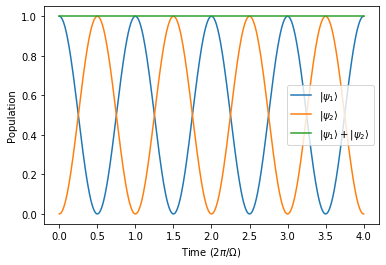

In [17]:
plt.figure()
plt.plot(times/(2*np.pi), pops[:,0], label=r'$|\psi_1\rangle$')
plt.plot(times/(2*np.pi), pops[:,1], label=r'$|\psi_2\rangle$')
plt.plot(times/(2*np.pi), pops[:,0]+pops[:,1], label=r'$|\psi_1\rangle+|\psi_2\rangle$')
plt.legend()
plt.xlabel('Time ($2\pi/\Omega$)')
plt.ylabel('Population')

# Effect Dephasing